In [52]:
import numpy as np
import xarray as xr

import os
import sys
home = os.path.expanduser("~")

sys.path.insert(0, f'{home}/Documents/code/phd/switch')
import myVars as mV                             # imports common variables

sys.path.insert(0, f'{home}/Documents/code/phd/util')
import myFuncs as mF                            # imports common operators
import constructed_fields as cF                 # imports fields for testing
import get_data as gD                           # imports functions to get data from gadi

In [10]:
ds = xr.open_dataset('/g/data/oi10/replicas/CMIP6/CMIP/AS-RCEC/TaiESM1/historical/r1i1p1f1/Amon/ta/gn/v20200623/ta_Amon_TaiESM1_historical_r1i1p1f1_gn_185001-201412.nc')
ds

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, plev: 19, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ta         (time, plev, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0671-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     171550.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    variable_id:               ta
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/8fdd81c6-7b33-424c-9b83-a4cff4bf596e

In [38]:
da = ds['ta'].isel(time = slice(0,4))
da

<xarray.DataArray 'ta' (time: 4, plev: 19, lat: 192, lon: 288)>
[4202496 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 1850-04-16 00:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    standard_name:  air_temperature
    long_name:      Air Temperature
    comment:        Air Temperature
    units:          K
    original_name:  T
    cell_methods:   time: mean
    cell_measures:  area: areacella
    history:        2020-06-08T08:41:02Z altered by CMOR: Converted type from...

In [39]:
theta = da * (1000e2 / da.plev)**(287/1005) 

In [37]:
da.plev

<xarray.DataArray 'plev' (plev: 19)>
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.,    500.,    100.])
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Attributes:
    units:          Pa
    axis:           Z
    positive:       down
    long_name:      pressure
    standard_name:  air_pressure

In [32]:
def calc_vertical_mean(da, plev2, plev1):
    da = da.sel(plev=slice(plev2, plev1))
    return (da * da.plev).sum(dim='plev') / da.plev.sum(dim='plev')

In [40]:
da_upper = calc_vertical_mean(theta, 400e2, 250e2)

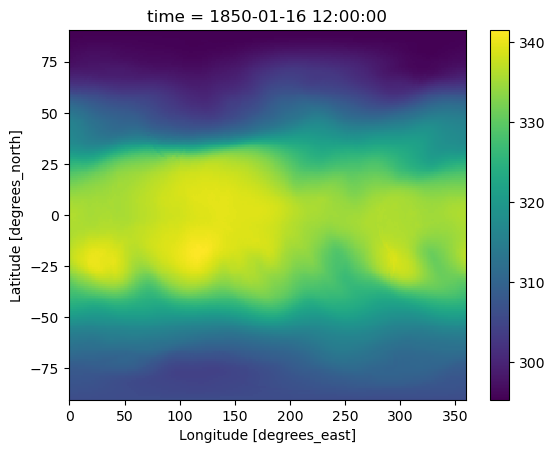

In [41]:
da_upper.isel(time=0).plot()

In [42]:
da_lower = calc_vertical_mean(theta, 925e2, 700e2)

In [43]:
diff = da_upper - da_lower

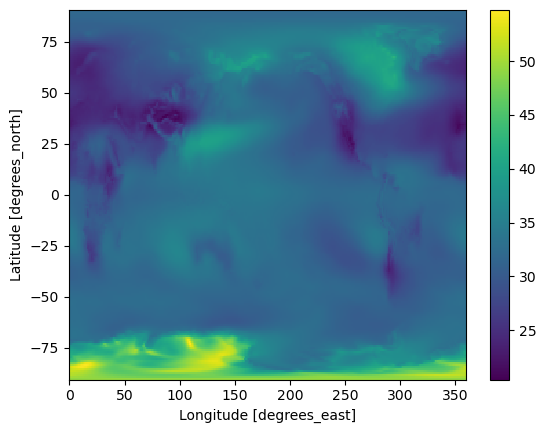

In [55]:
diff.mean(dim='time').plot()

In [9]:
da = ds['wap']
da

<xarray.DataArray 'wap' (time: 120, plev: 19, lat: 94, lon: 192)>
array([[[[-2.925683e-05, ..., -2.928227e-05],
         ...,
         [-6.913434e-06, ..., -6.326862e-06]],

        ...,

        [[-3.688686e-08, ..., -3.691623e-08],
         ...,
         [-5.079506e-07, ..., -5.052401e-07]]],


       ...,


       [[[-3.354008e-05, ..., -3.369349e-05],
         ...,
         [-1.636718e-06, ..., -1.231541e-06]],

        ...,

        [[-3.804128e-08, ..., -3.803430e-08],
         ...,
         [-9.235713e-07, ..., -9.222139e-07]]]], dtype=float32)
Coordinates:
  * time     (time) object 1870-01-16 12:00:00 ... 1879-12-16 12:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -88.54 -86.65 -84.75 -82.85 ... 84.75 86.65 88.54
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  lagrangian_tendency_of_air_pressure
    long_name:      Omega (=dp/dt)
    comment:        Omega (vertical velocity in pressure coordinates, positiv...
    units:          Pa s-1
    cell_methods:   time: mean
    cell_measures:  area: areacella
    history:        2019-12-24T08:57:43Z altered by CMOR: Inverted axis: plev...

In [8]:
da.plev

<xarray.DataArray 'plev' (plev: 19)>
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.,    500.,    100.])
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Attributes:
    units:          Pa
    axis:           Z
    positive:       down
    long_name:      pressure
    standard_name:  air_pressure

In [6]:
da = ds['wap']*60*60*24*1000/100

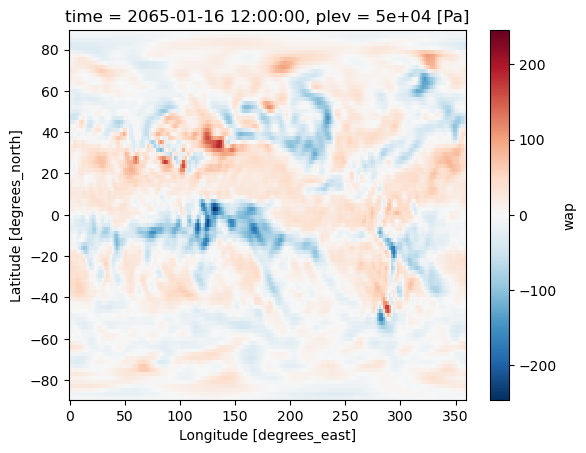

In [7]:
da.isel(time=0).sel(plev = 500e2).plot()

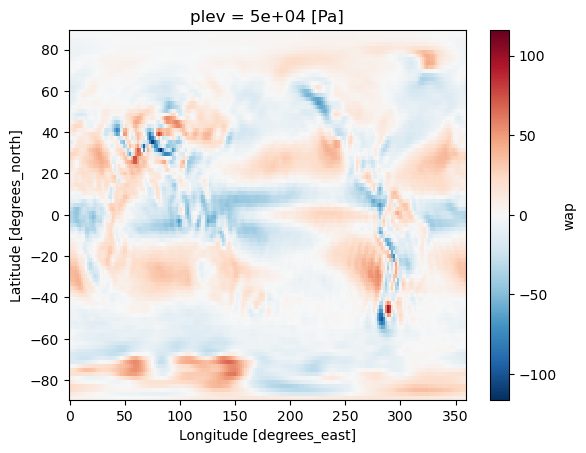

In [8]:
da.mean(dim = 'time').sel(plev = 500e2).plot()

In [12]:
60*60*24/100

864.0

In [18]:
ds.lev

<xarray.DataArray 'lev' (lev: 19)>
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.,    500.,    100.])
Coordinates:
  * lev      (lev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Attributes:
    units:          Pa
    axis:           Z
    positive:       down
    long_name:      pressure
    standard_name:  air_pressure

In [11]:
p_hybridsigma = ds.lev+ds.b*ds.orog

In [12]:
p_hybridsigma

<xarray.DataArray (lev: 85, lat: 144, lon: 192)>
array([[[2.82617853e+03, 2.82663063e+03, 2.82711392e+03, ...,
         2.82394920e+03, 2.82458838e+03, 2.82522756e+03],
        [2.68986213e+03, 2.69962129e+03, 2.70952075e+03, ...,
         2.66133297e+03, 2.67065561e+03, 2.68013415e+03],
        [2.61418969e+03, 2.63057447e+03, 2.64708397e+03, ...,
         2.56520683e+03, 2.58159161e+03, 2.59791404e+03],
        ...,
        [1.99999981e+01, 1.99999981e+01, 1.99999981e+01, ...,
         1.99999981e+01, 1.99999981e+01, 1.99999981e+01],
        [1.99999981e+01, 1.99999981e+01, 1.99999981e+01, ...,
         1.99999981e+01, 1.99999981e+01, 1.99999981e+01],
        [1.99999981e+01, 1.99999981e+01, 1.99999981e+01, ...,
         1.99999981e+01, 1.99999981e+01, 1.99999981e+01]],

       [[2.84893999e+03, 2.84939039e+03, 2.84987185e+03, ...,
         2.84671906e+03, 2.84735583e+03, 2.84799260e+03],
        [2.71313714e+03, 2.72285953e+03, 2.73272170e+03, ...,
         2.68471546e+03, 2.69400298e+03, 2.70344582e+03],
        [2.63774979e+03, 2.65407284e+03, 2.67052015e+03, ...,
         2.58895146e+03, 2.60527452e+03, 2.62153545e+03],
...
        [7.91000156e+04, 7.91000156e+04, 7.91000156e+04, ...,
         7.91000156e+04, 7.91000156e+04, 7.91000156e+04],
        [7.91000156e+04, 7.91000156e+04, 7.91000156e+04, ...,
         7.91000156e+04, 7.91000156e+04, 7.91000156e+04],
        [7.91000156e+04, 7.91000156e+04, 7.91000156e+04, ...,
         7.91000156e+04, 7.91000156e+04, 7.91000156e+04]],

       [[8.50000000e+04, 8.50000000e+04, 8.50000000e+04, ...,
         8.50000000e+04, 8.50000000e+04, 8.50000000e+04],
        [8.50000000e+04, 8.50000000e+04, 8.50000000e+04, ...,
         8.50000000e+04, 8.50000000e+04, 8.50000000e+04],
        [8.50000000e+04, 8.50000000e+04, 8.50000000e+04, ...,
         8.50000000e+04, 8.50000000e+04, 8.50000000e+04],
        ...,
        [8.50000000e+04, 8.50000000e+04, 8.50000000e+04, ...,
         8.50000000e+04, 8.50000000e+04, 8.50000000e+04],
        [8.50000000e+04, 8.50000000e+04, 8.50000000e+04, ...,
         8.50000000e+04, 8.50000000e+04, 8.50000000e+04],
        [8.50000000e+04, 8.50000000e+04, 8.50000000e+04, ...,
         8.50000000e+04, 8.50000000e+04, 8.50000000e+04]]])
Coordinates:
  * lev      (lev) float64 20.0 53.33 100.0 160.0 ... 7.378e+04 7.91e+04 8.5e+04
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1

In [13]:
p_hybridsigma[:, 0, 0]

<xarray.DataArray (lev: 85)>
array([ 2826.17853309,  2848.93999422,  2880.83946304,  2921.91053028,
        2972.19621857,  3031.74947924,  3100.63212565,  3178.91638028,
        3266.6834415 ,  3364.02427715,  3471.03977637,  3587.83942184,
        3714.54358068,  3851.28109067,  3998.19083417,  4155.42126365,
        4323.1309372 ,  4501.48709761,  4690.66628436,  4890.85654552,
        5102.25330204,  5325.06241574,  5559.50035699,  5805.7910455 ,
        6064.16836825,  6334.87917102,  6618.17449861,  6914.31958264,
        7223.58685265,  7546.25846125,  7882.62675785,  8232.99357813,
        8597.66974115,  8976.97772758,  9371.24997801,  9780.81853   ,
       10206.04814395, 10647.28968963, 11104.93507308, 11579.37119523,
       12071.0088173 , 12580.27823116, 13107.63690421, 13653.57674486,
       14218.61828078, 14803.35444393, 15408.39225208, 16034.46703895,
       16682.3572251 , 17352.98270444, 18046.29101562, 18756.703125  ,
       19483.88671875, 20228.77539062, 20992.52734375, 21776.5078125 ,
       22582.39257812, 23412.16210938, 24268.1796875 , 25153.22460938,
       26070.58789062, 27024.109375  , 28018.26171875, 29058.2265625 ,
       30150.01757812, 31300.53515625, 32517.7109375 , 33810.59375   ,
       35189.5234375 , 36666.23828125, 38254.02734375, 39967.92578125,
       41824.8515625 , 43843.83203125, 46046.20703125, 48455.83203125,
       51099.34765625, 54006.42578125, 57210.015625  , 60746.703125  ,
       64656.95703125, 68985.5234375 , 73781.765625  , 79100.015625  ,
       85000.        ])
Coordinates:
  * lev      (lev) float64 20.0 53.33 100.0 160.0 ... 7.378e+04 7.91e+04 8.5e+04
    lat      float64 -89.38
    lon      float64 0.9375

In [14]:
plev= 1000e2 * (1 -  0.0065*p_hybridsigma[:, 0, 0]/288.15)**(9.81*0.029)/(8.314*0.0065) 
plev

<xarray.DataArray (lev: 85)>
array([1816091.02115283, 1815807.62506966, 1815410.26711727,
       1814898.34016799, 1814271.06338295, 1813527.47426135,
       1812666.43979072, 1811686.63453   , 1810586.55547572,
       1809364.50863467, 1808018.60309136, 1806546.76318586,
       1804946.69460025, 1803215.90908938, 1801351.6983382 ,
       1799351.13294009, 1797211.04781979, 1794928.05180727,
       1792498.51053929, 1789918.50762267, 1787183.88638535,
       1784290.19796481, 1781232.68512719, 1778006.30828844,
       1774605.69626213, 1771025.08814705, 1767258.42871334,
       1763299.2141146 , 1759140.55980467, 1754775.13997468,
       1750195.15091917, 1745392.28714205, 1740357.71127782,
       1735081.97575521, 1729554.99962564, 1723766.16396248,
       1717703.78615825, 1711355.71425357, 1704708.46809052,
       1697747.81333051, 1690458.2479761 , 1682822.9492429 ,
       1674823.52528612, 1666439.74453594, 1657649.43661073,
       1648427.58258318, 1638746.95368186, 1628575.9601194 ,
       1617879.58432343, 1606617.25853875, 1594761.39008255,
       1582378.60427102, 1569445.88746606, 1555914.36860324,
       1541725.82043266, 1526811.59320776, 1511088.86404182,
       1494458.32122586, 1476799.42961154, 1457965.41765035,
       1437775.31723039, 1416004.81949076, 1392372.58170091,
       1366521.2226144 , 1337988.44149617, 1306165.46861171,
       1270228.36275923, 1229025.12264893, 1180869.38721574,
       1123137.02678482, 1051361.19796887,  956783.11766056,
        817160.76459615,  512736.95782311,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan])
Coordinates:
  * lev      (lev) float64 20.0 53.33 100.0 160.0 ... 7.378e+04 7.91e+04 8.5e+04
    lat      float64 -89.38
    lon      float64 0.9375

In [3]:
ds.plev

<xarray.DataArray 'plev' (plev: 19)>
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.,    500.,    100.])
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Attributes:
    units:          Pa
    axis:           Z
    positive:       down
    long_name:      pressure
    standard_name:  air_pressure

In [13]:
ds.klevp1

<xarray.DataArray 'klevp1' (klevp1: 80)>
array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72., 73., 74., 75., 76., 77., 78., 79., 80.])
Coordinates:
  * klevp1   (klevp1) float64 1.0 2.0 3.0 4.0 5.0 ... 76.0 77.0 78.0 79.0 80.0
Attributes:
    name:           klevp1
    standard_name:  number of layer interfaces
    long_name:      number of layer interfaces
    units:          1

In [21]:
da = ds['cl'].isel(time = slice(0, 4))
da = da.where((ds.lev < 1100e2) & (ds.lev >= 600), 0).max(dim='lev')
da

<xarray.DataArray 'cl' (time: 4, lat: 94, lon: 192)>
array([[[36.712223, 35.930496, 35.14402 , ..., 39.326305, 38.453358,
         37.581997],
        [43.98973 , 42.567234, 41.11237 , ..., 49.015648, 47.319046,
         45.64371 ],
        [51.865047, 48.62155 , 45.272537, ..., 58.89823 , 56.549828,
         54.205414],
        ...,
        [17.081158, 16.76316 , 16.445143, ..., 14.757675, 15.534522,
         16.309015],
        [20.118221, 20.677164, 21.236126, ..., 18.374025, 18.95982 ,
         19.54122 ],
        [24.84259 , 25.005547, 25.168207, ..., 24.24951 , 24.447798,
         24.645481]],

       [[15.666683, 15.925118, 16.186394, ..., 15.268653, 15.310747,
         15.486984],
        [19.505163, 19.275623, 19.036911, ..., 21.394222, 20.77093 ,
         20.141232],
        [22.011599, 20.839855, 19.6656  , ..., 25.12986 , 24.135866,
         23.096573],
...
        [28.949467, 28.748585, 28.536352, ..., 29.26026 , 29.152706,
         29.04911 ],
        [28.087185, 28.372705, 28.661339, ..., 27.864977, 27.93893 ,
         28.012999],
        [27.08235 , 27.219831, 27.359695, ..., 26.863895, 26.936045,
         27.008863]],

       [[22.586071, 22.734163, 22.880857, ..., 23.730404, 23.258034,
         22.78567 ],
        [23.067783, 22.640463, 22.225447, ..., 22.677729, 22.801315,
         22.931318],
        [30.74162 , 28.789484, 26.892475, ..., 34.173866, 33.133324,
         32.136784],
        ...,
        [37.491505, 36.805546, 36.117065, ..., 36.455574, 36.800682,
         37.146008],
        [29.850197, 29.325632, 28.806051, ..., 30.968594, 30.59419 ,
         30.221397],
        [19.849169, 19.33457 , 18.819113, ..., 20.972122, 20.597166,
         20.222849]]], dtype=float32)
Coordinates:
  * time     (time) object 1870-01-16 12:00:00 ... 1870-04-16 00:00:00
  * lat      (lat) float64 -88.54 -86.65 -84.75 -82.85 ... 84.75 86.65 88.54
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

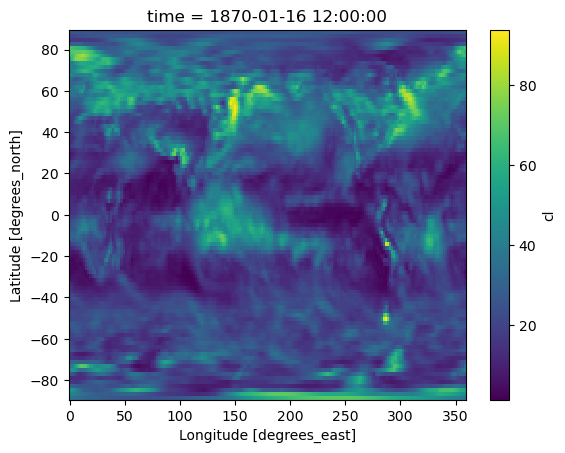

In [22]:
da.isel(time=0).plot()